In [1]:
import sys
sys.path.append("..")
sys.path.append(".")

import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from create_base import *
from myDtw import *
from find_mismatch import *
from filters import *
from vocal_separation import *


codes = np.array(['[1000,1000;2000;1000,500,500;2000]',
                  '[2000;1000,1000;500,500,1000;2000]',
                  '[1000,1000;500,500,1000;1000,1000;2000]',
                  '[1000,--(1000);1000,--(1000);500,250,250,1000;--(1000),1000]',
                  '[500;1000,500,1000,500;500,500,500,250,250,500,500;250,250,500,500,1000]',
                  '[1000,--(1000);1000,--(1000);1000,-(500),500;1000,1000]',
                  '[750,250,500,500,500,-(500);500,1000,500,500,-(500);750,250,500,500,500,-(500)]',
                  '[500,1000,500,500,250,250;1000,500,750,250,500;3000]',
                  '[500,500,500;1000,500;500,500,500;1500;500,500,500;1000,500;500;1000;1500]',
                  '[500,500,1000;500,500;1000;375,125,250,250,375,125,250,250;500,500,1000]',
                  '[500,500,1000;l500,500,1000;500,500,750,250;2000]',
                  '[1000,1000;500,500,1000;1000,500,500;2000]',
                  '[1000,1000;500,500,1000;500,250,250,250;2000]',
                  '[500,1000,500;250,250,250,250,500,500;500,500,500,500;2000]'])
# 1. Get the file path to the included audio example
# Sonify detected beat events
# 定义加载语音文件并去掉两端静音的函数


In [2]:
filepath = 'F:\项目\花城音乐项目\样式数据\音乐样本2019-01-29\节奏九\\'
# filename = 'F:/项目/花城音乐项目/样式数据/ALL/节奏/节奏八/节奏八（标准音频）.wav'
#filename = 'F:/项目/花城音乐项目/样式数据/ALL/节奏/节奏八/节奏8.100分.wav'
#filename = 'F:/项目/花城音乐项目/样式数据/ALL/旋律/1.31MP3/旋律1.100分.wav'
#filename = 'F:/项目/花城音乐项目/样式数据/ALL/旋律/1.31MP3/旋律2.100分.wav'
#filename = 'F:/项目/花城音乐项目/样式数据/ALL/节奏/节奏八/节奏八（1）(90).wav'
#filename = 'F:/项目/花城音乐项目/样式数据/ALL/节奏/节奏八/节奏八（2）（90分）.wav'
filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/节奏/节奏4卢(65).wav'
filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/节奏/节奏2-01（80）.wav'
filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/节奏/节奏4-02（68）.wav'
filename = 'F:/项目/花城音乐项目/样式数据/3.06MP3/节奏/节奏二（4）（100）.wav'
filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/节奏/节奏7-02（30）.wav'
filename = './single_onsets/样式数据/WAV/1.31/节奏1.50分.wav'
#filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/视唱1-02（90）.wav'
#filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律2（四）(96).wav'
#filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律1.1(95).wav'
#filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律2.1(80).wav'
#filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律2.3(55).wav'
#filename = 'F:/项目/花城音乐项目/样式数据/3.19MP3/节奏/节奏六1(10).wav'

#filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律二（10）（75）.wav'
# filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律二（8）（100）.wav'
# filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律7_40218（20）.wav'
# filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律一（9）（100）.wav'
# filename = 'F:/项目/花城音乐项目/样式数据/2.27MP3/旋律/旋律一（14）（95）.wav'
#filename = 'F:/项目/花城音乐项目/样式数据/3.06MP3/节奏/节1罗（90）.wav'

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`


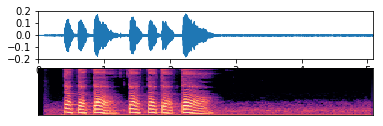

In [3]:
# plt.figure(figsize=(8,6),dpi=400)
plt.subplot(4,1,1)
#第一行第二列图形
y,sr = librosa.load(filename)
librosa.display.waveplot(y, sr=sr)

plt.subplot(4,1,2)
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512)
logmelspec = librosa.power_to_db(melspec)
librosa.display.specshow(logmelspec, sr=sr)
plt.show()

In [4]:
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

## 正常的CQT图，以及librosa的onset_frame

(128, 220)
(128,)


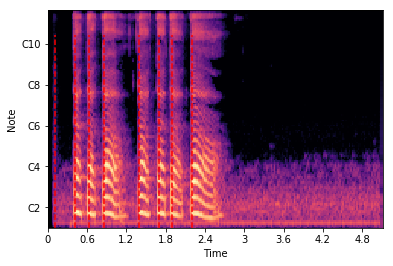

[ 5 18 27 37 60 73 82 95]


In [5]:
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
# convert to log scale
logmelspec = librosa.power_to_db(melspec)
logmelspec.shape
CQT = librosa.power_to_db(melspec,ref=np.max)
print(CQT.shape)
print(CQT[:,1].shape)
plt.vlines(librosa.frames_to_time(onset_frames),  0,sr, color='r', linestyle='dashed')

librosa.display.specshow(CQT, y_axis='cqt_note',x_axis='time')
plt.show()
print(onset_frames)

## 去伪

### ①计算CQT相邻帧之间的欧式距离，并正则化CQT


In [6]:
dist = np.zeros((CQT.shape[1]-1,1))

a = CQT[:,1]  
b = CQT[:,0]
for i in range(dist.shape[0]):
    dist[i] = np.linalg.norm(CQT[:,i+1]-CQT[:,i])


#### 归一化

In [7]:
##
Normalized_CQT = CQT
Normalized_CQT = Normalized_CQT/np.max(abs(CQT))
Normalized_CQT

array([[-1.        , -1.        , -1.        , ..., -0.72838103,
        -0.61796771, -0.62757988],
       [-1.        , -1.        , -1.        , ..., -0.61604389,
        -0.53685539, -0.58911824],
       [-1.        , -1.        , -1.        , ..., -0.43777628,
        -0.39675287, -0.55294856],
       ...,
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

#### 设置阀值


In [8]:
threhold = -0.5 ##低于-0.5的置为0
for i in range(Normalized_CQT.shape[0]):
    for j in range(Normalized_CQT.shape[1]):
        if Normalized_CQT[i][j]<threhold:
            Normalized_CQT[i][j] = -1
Normalized_CQT

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -0.43777628,
        -0.39675287, -1.        ],
       ...,
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

#### 正则化后的CQT，很明显对比度更强了

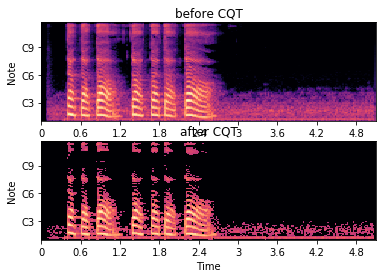

In [9]:
plt.subplot(2,1,1)
librosa.display.specshow(CQT, y_axis='cqt_note',x_axis='time')
plt.title('before CQT')
plt.subplot(2,1,2)

plt.title('after CQT')
librosa.display.specshow(Normalized_CQT, y_axis='cqt_note',x_axis='time')
plt.show()

### ②把整个正则化后的cqt每一帧求取(竖直方向)求平均值

#### -1是那些黑色的区间，我们要做的就是分开这些区间

In [10]:
average_CQT = []
for i in range(CQT.shape[1]):
    average_CQT.append(np.sum(Normalized_CQT[:,i])/CQT.shape[0])
print(np.mean(average_CQT))
average_CQT = np.array(average_CQT)
average_CQT = np.array([average_CQT[i] if average_CQT[i]>=np.mean(average_CQT) else -1 for i in range(average_CQT.shape[0]) ])

itemindex = np.argwhere(average_CQT ==-1)
print(average_CQT)
print(average_CQT.shape)

-0.8616425969492068
[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -0.68794416
 -0.56572875 -0.56185586 -0.62792961 -0.6794908  -0.78685281 -0.86129121
 -1.         -1.         -0.64267055 -0.58159359 -0.59508667 -0.61288296
 -0.71315726 -0.78751322 -0.86082789 -1.         -1.         -1.
 -0.74593019 -0.48850965 -0.55516338 -0.5919014  -0.61929367 -0.59271614
 -0.61893861 -0.5998455  -0.66421913 -0.706838   -0.73318914 -0.75694295
 -0.77963695 -0.81877892 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -0.85871828
 -0.57275383 -0.63274931 -0.64545854 -0.64343463 -0.66755063 -0.68266321
 -0.7606103  -0.85787715 -1.         -1.         -1.         -1.
 -0.61604885 -0.63621612 -0.61399864 -0.66910926 -0.69356962 -0.76828194
 -1.         -1.         -1.         -0.58947297 -0.58223678 -0.6006576

#### 判断黑色(-1连续)区间


In [11]:
space_index = []
i=1
index = 0
start_index = 0
end_index = 0
while(i<average_CQT.shape[0]):
    if(average_CQT[i]==-1):
        if(i!=0 and average_CQT[i-1]!=-1):##如果不是第一个，且前面一个帧不是-1，那么从当前点开始
            start_index = i
        elif (i==0):                       ##如果是第一个，起点为0
            start_index = 0
        if(i+1!=average_CQT.shape[0]):     ##不是最后一个
            if(average_CQT[i+1]!=-1):
                end_index = i
                space_index.append((start_index,end_index))##终点
        elif(i+1==average_CQT.shape[0]):##结尾判定
            if(average_CQT[i]==-1):
                    end_index = i
                    space_index.append((start_index,end_index))
    i= i+1
        
space_index       

[(0, 16),
 (24, 25),
 (33, 35),
 (50, 58),
 (68, 71),
 (78, 80),
 (89, 93),
 (113, 219)]

#### 初步检测街拍间的间距

In [12]:
onset_space = [(space_index[i][1]+1,space_index[i+1][0]-1) for i in range(len(space_index)-1)]
# onset_space.append(space_index[-1][0]-space_index[-2][1])
# onset_space##表示区间范围

#### 判断-1区间间隔大小


In [13]:
##判断空白间隔之间的距离
exclude = []
blank_space = [x[1]-x[0]+1 for x in space_index]
print(len(blank_space))
for i in range(len(blank_space)):
    if (i<len(blank_space)-1):
        if(blank_space[i]<=5 and space_index[i+1][0]-space_index[i][1]<5): ##间隔太小了，而且前后两个黑色区间的间隔也小于一定区间
            exclude.append(i)    ##去除改帧
        
print(exclude)

8
[]


In [14]:
space_index = np.delete(space_index,exclude)##间隔，去掉了

In [15]:
space_index

array([  0,  16,  24,  25,  33,  35,  50,  58,  68,  71,  78,  80,  89,
        93, 113, 219])

### ③检测节拍点


In [16]:
detect_onset = []
# detect_onset = [x+1 for x in space_index]
for x in space_index:##每一个符合要求的-1大区间的起点+1
    k = x+1
    while(k<average_CQT.shape[0]-1 and average_CQT[k]<average_CQT[k+1]):##类似贪心，如果后面有一直递增的，渠道这个点
        k+=1
    detect_onset.append(k)  
detect_onset

[1, 19, 27, 27, 34, 37, 51, 60, 69, 72, 79, 82, 90, 95, 114, 220]

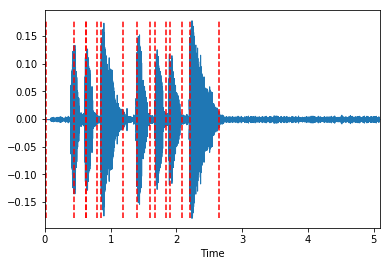

In [17]:
librosa.display.waveplot(y, sr=sr)
plt.vlines(librosa.frames_to_time(detect_onset),-np.max(y),np.max(y), color='r', linestyle='dashed')   
plt.show()
detect_onset = np.unique(detect_onset)

#### 去除间隔相近的节拍，循环5次的原因是有一些相近而且比较多的伪街拍聚集在一起，一次可能无法完全去除

In [18]:
for i in range(5):
    mean_diff = np.mean(np.diff(detect_onset))
    min_diff = np.min(np.diff(detect_onset))
    print(min_diff)
    if min_diff<10:
        for i in range(detect_onset.shape[0]-1):
            if detect_onset[i + 1] - detect_onset[i] <= 10 and detect_onset[i + 1]<detect_onset.shape[0]:
                if average_CQT[detect_onset[i+1]]-average_CQT[detect_onset[i+1]-1]>average_CQT[detect_onset[i]]-average_CQT[detect_onset[i]-1]:##从梯度来考虑
                    detect_onset[i]=detect_onset[i+1] 
                else:
                    detect_onset[i+1]=detect_onset[i] 

#         if detect_onset[-1]-detect_onset[-2]<=10:
#             if average_CQT[detect_onset[-1]]-average_CQT[detect_onset[-1]-1]>average_CQT[detect_onset[-2]]-average_CQT[detect_onset[-2]-1]:##从梯度来考虑
#                 detect_onset[-2]=detect_onset[-1] 
#             else:
#                 detect_onset[-1]=detect_onset[-2]
detect_onset= np.unique(detect_onset)##去重


3
3
3
3
3


In [19]:
# detect_onset = np.array(detect_onset)        
# for i in range(5):
#     exclude = []
#     diff = np.diff(detect_onset)##间距
#     print(diff.shape)
#     for i in range(diff.shape[0]-1):
#         if(diff[i]<10 and diff[i+1]<10):
#             exclude.append(i)
#     print(exclude)
#     detect_onset = np.delete(detect_onset,exclude)


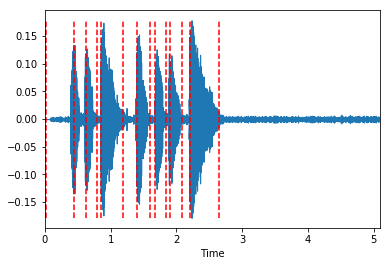

array([  1,  19,  27,  34,  37,  51,  60,  69,  72,  79,  82,  90,  95,
       114, 220])

In [20]:
librosa.display.waveplot(y, sr=sr)
plt.vlines(librosa.frames_to_time(detect_onset),-np.max(y),np.max(y), color='r', linestyle='dashed')   
plt.show()
detect_onset

### 调整最佳帧的位置，不断往峰值走,类似贪心

In [21]:
# detect_onset = [x[0] for x in onset_space]
onset_space = detect_onset
detect_onset = []
for x in onset_space:
    k = x+1
    if(k<average_CQT.shape[0]-1):
        while(k<average_CQT.shape[0]-1 and average_CQT[k]<=(average_CQT[k+1]) and average_CQT[k]-average_CQT[k-1]>=average_CQT[k+1]-average_CQT[k] ):
            k+=1
        detect_onset.append(k)

In [22]:
detect_onset = np.unique(detect_onset)

### 使用rms来判断

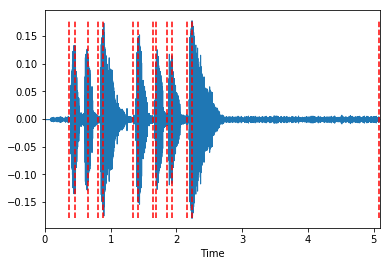

In [23]:
librosa.display.waveplot(y, sr=sr)
plt.vlines(librosa.frames_to_time(detect_onset),-np.max(y),np.max(y), color='r', linestyle='dashed')   
plt.show()

#### 类似于上面的cqt的贪心操作，有利于去伪和调整最佳位置

In [24]:
# detect_onset = [x[0] for x in onset_space]
rms =librosa.feature.rmse(y)[0]
onset_space = detect_onset
detect_onset = []
for x in onset_space:
    k = x+1
    if(k<rms.shape[0]):
        while(k<rms.shape[0]-1 and rms[k]<=(rms[k+1]) and rms[k]-rms[k-1]>=rms[k+1]-rms[k] ):
            k+=1
        print(k)
        detect_onset.append(k)

19
21
29
39
39
62
62
74
74
83
84
97
97


In [25]:
detect_onset = np.unique(detect_onset)

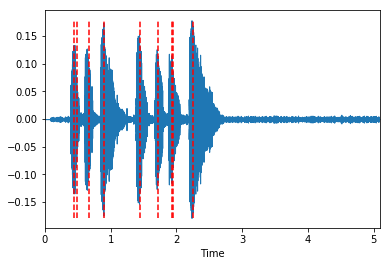

array([19, 21, 29, 39, 62, 74, 83, 84, 97])

In [26]:
librosa.display.waveplot(y, sr=sr)
plt.vlines(librosa.frames_to_time(detect_onset),-np.max(y),np.max(y), color='r', linestyle='dashed')   
plt.show()
detect_onset

#### 由于上面的操作使得检测出来的街拍在rms的峰值了，接下来排序，低于均值2/3的去除

In [27]:

onset_rms = rms[detect_onset]
mean_onset_rms = np.mean(onset_rms)*1/2##低于2/3的去除
new_onset = []
for x in detect_onset:
    print(x)
    if rms[x]>=mean_onset_rms:
        new_onset.append(x)
new_onset

19
21
29
39
62
74
83
84
97


[19, 21, 29, 39, 62, 74, 83, 84, 97]

In [28]:
new_onset= np.unique(new_onset)##去重
new_onset

array([19, 21, 29, 39, 62, 74, 83, 84, 97])

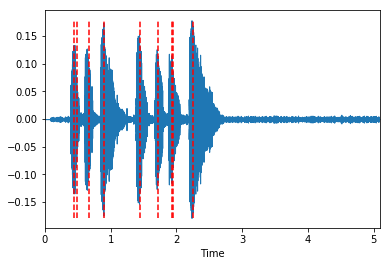

In [29]:
librosa.display.waveplot(y, sr=sr)
plt.vlines(librosa.frames_to_time(new_onset),-np.max(y),np.max(y), color='r', linestyle='dashed')   
plt.show()

#### 最后一步


In [30]:
mean_diff = np.mean(np.diff(new_onset))
min_diff = np.min(np.diff(new_onset))
print(min_diff)
if min_diff<10:
    for i in range(new_onset.shape[0]-1):
        if new_onset[i+1]-new_onset[i]<=10:
            if rms[new_onset[i+1]]-rms[new_onset[i+1]-1]>rms[new_onset[i]]-rms[new_onset[i]-1]:##从梯度来考虑
                new_onset[i]=new_onset[i+1] 
            else:
                new_onset[i+1]=new_onset[i] 

    if new_onset[-1]-new_onset[-2]<=10:
        if rms[new_onset[-1]]-rms[new_onset[-1]-1]>rms[new_onset[-2]]-rms[new_onset[-2]-1]:##从梯度来考虑
            new_onset[-2]=new_onset[-1] 
        else:
            new_onset[-1]=new_onset[-2] 

1


In [31]:
new_onset= np.unique(new_onset)##去重
new_onset

array([19, 39, 62, 74, 97])

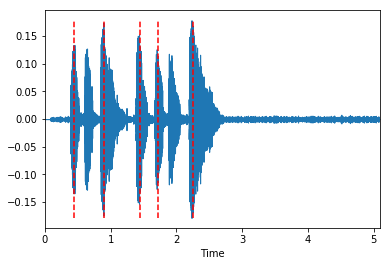

In [32]:
librosa.display.waveplot(y, sr=sr)
plt.vlines(librosa.frames_to_time(new_onset),-np.max(y),np.max(y), color='r', linestyle='dashed')   
plt.show()